# Aprendizaje No Supervisado - Diplodatos 2021

### Integrantes:
<li> Pablo Carrazana
<li> Luis Juncos
<li> Bruno Garcia
<li> Martin Peñas

# Práctico Entregable


Utilizar la base de jugadores “players_21.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv. Considerar que la base 2021 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019_Colab, ntb_clustering_2_fifa2019_Colab y ntb4_embeddings_fifa2019_Colab). Realicen comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio (sintético, no muy extenso) .

2- Evaluación visual e intuitiva de a dos variables por vez.

3- Uso de técnicas de clustering: k-Medias, Mean Shift y Alguna jerárquica (sugerencia: usar 'cityblock' como distancia en el jerárquico).

4- Análisis de los clusters encontrados.

5- Embeddings y técnicas de clustering.

6- Evaluación.

7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?




## Inicialización del Entorno
Importamos las librerias que utilizaremos y cargamos los datos

In [101]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [102]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import missingno as msno
from sklearn import (manifold, preprocessing, decomposition)

## Exploramos la base de datos
Cargamos los datos de la database de la consigna. Link Kaggle https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv.

In [103]:
df = pd.read_csv("players_21.csv")
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        188         87    Slovenia      Atlético Madrid   
3        184         80      Poland    FC Bayern München   
4        175         68      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         93   67500000   
1         Italian Serie A          1.0       92         92   46000000   
2  Spain Primera Division          1.0       91         93   75000000   
3    German 1. Bundesliga          1.0       91         91   80000000   
4          French Ligue 1          1.0       91         91   90000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    560000       RW, ST, CF           Left                         5   
1    220000           ST, LW          Right                         5   
2    125000               GK          Right                         3   
3    240000               ST          Right                         4   
4    270000          LW, CAM          Right                         5   

   weak_foot  skill_moves      work_rate             body_type real_face  \
0          4            4     Medium/Low                 Messi       Yes   
1          4            5       High/Low            C. Ronaldo       Yes   
2          3            1  Medium/Medium  PLAYER_BODY_TYPE_259       Yes   
3          4            4    High/Medium  PLAYER_BODY_TYPE_276       Yes   
4          5            5    High/Medium                Neymar       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2         159400000.0                                                NaN   
3         132000000.0              #Distance Shooter, #Clinical Finisher   
4         166500000.0  #Speedster, #Dribbler, #Playmaker, #FK Special...   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0         NaN  2004-07-01   
1            LS                 7.0         NaN  2018-07-10   
2            GK                13.0         NaN  2014-07-16   
3            ST                 9.0         NaN  2014-07-01   
4            LW                10.0         NaN  2017-08-03   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
2                2023.0              GK                   1.0   NaN       NaN   
3                2023.0             NaN                   NaN  78.0      91.0   
4                2022.0             NaN                   NaN  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.0       38.0

In [104]:
columns = pd.DataFrame()
columns = df.columns.to_frame()
print(len(df.columns))

106


<AxesSubplot:>

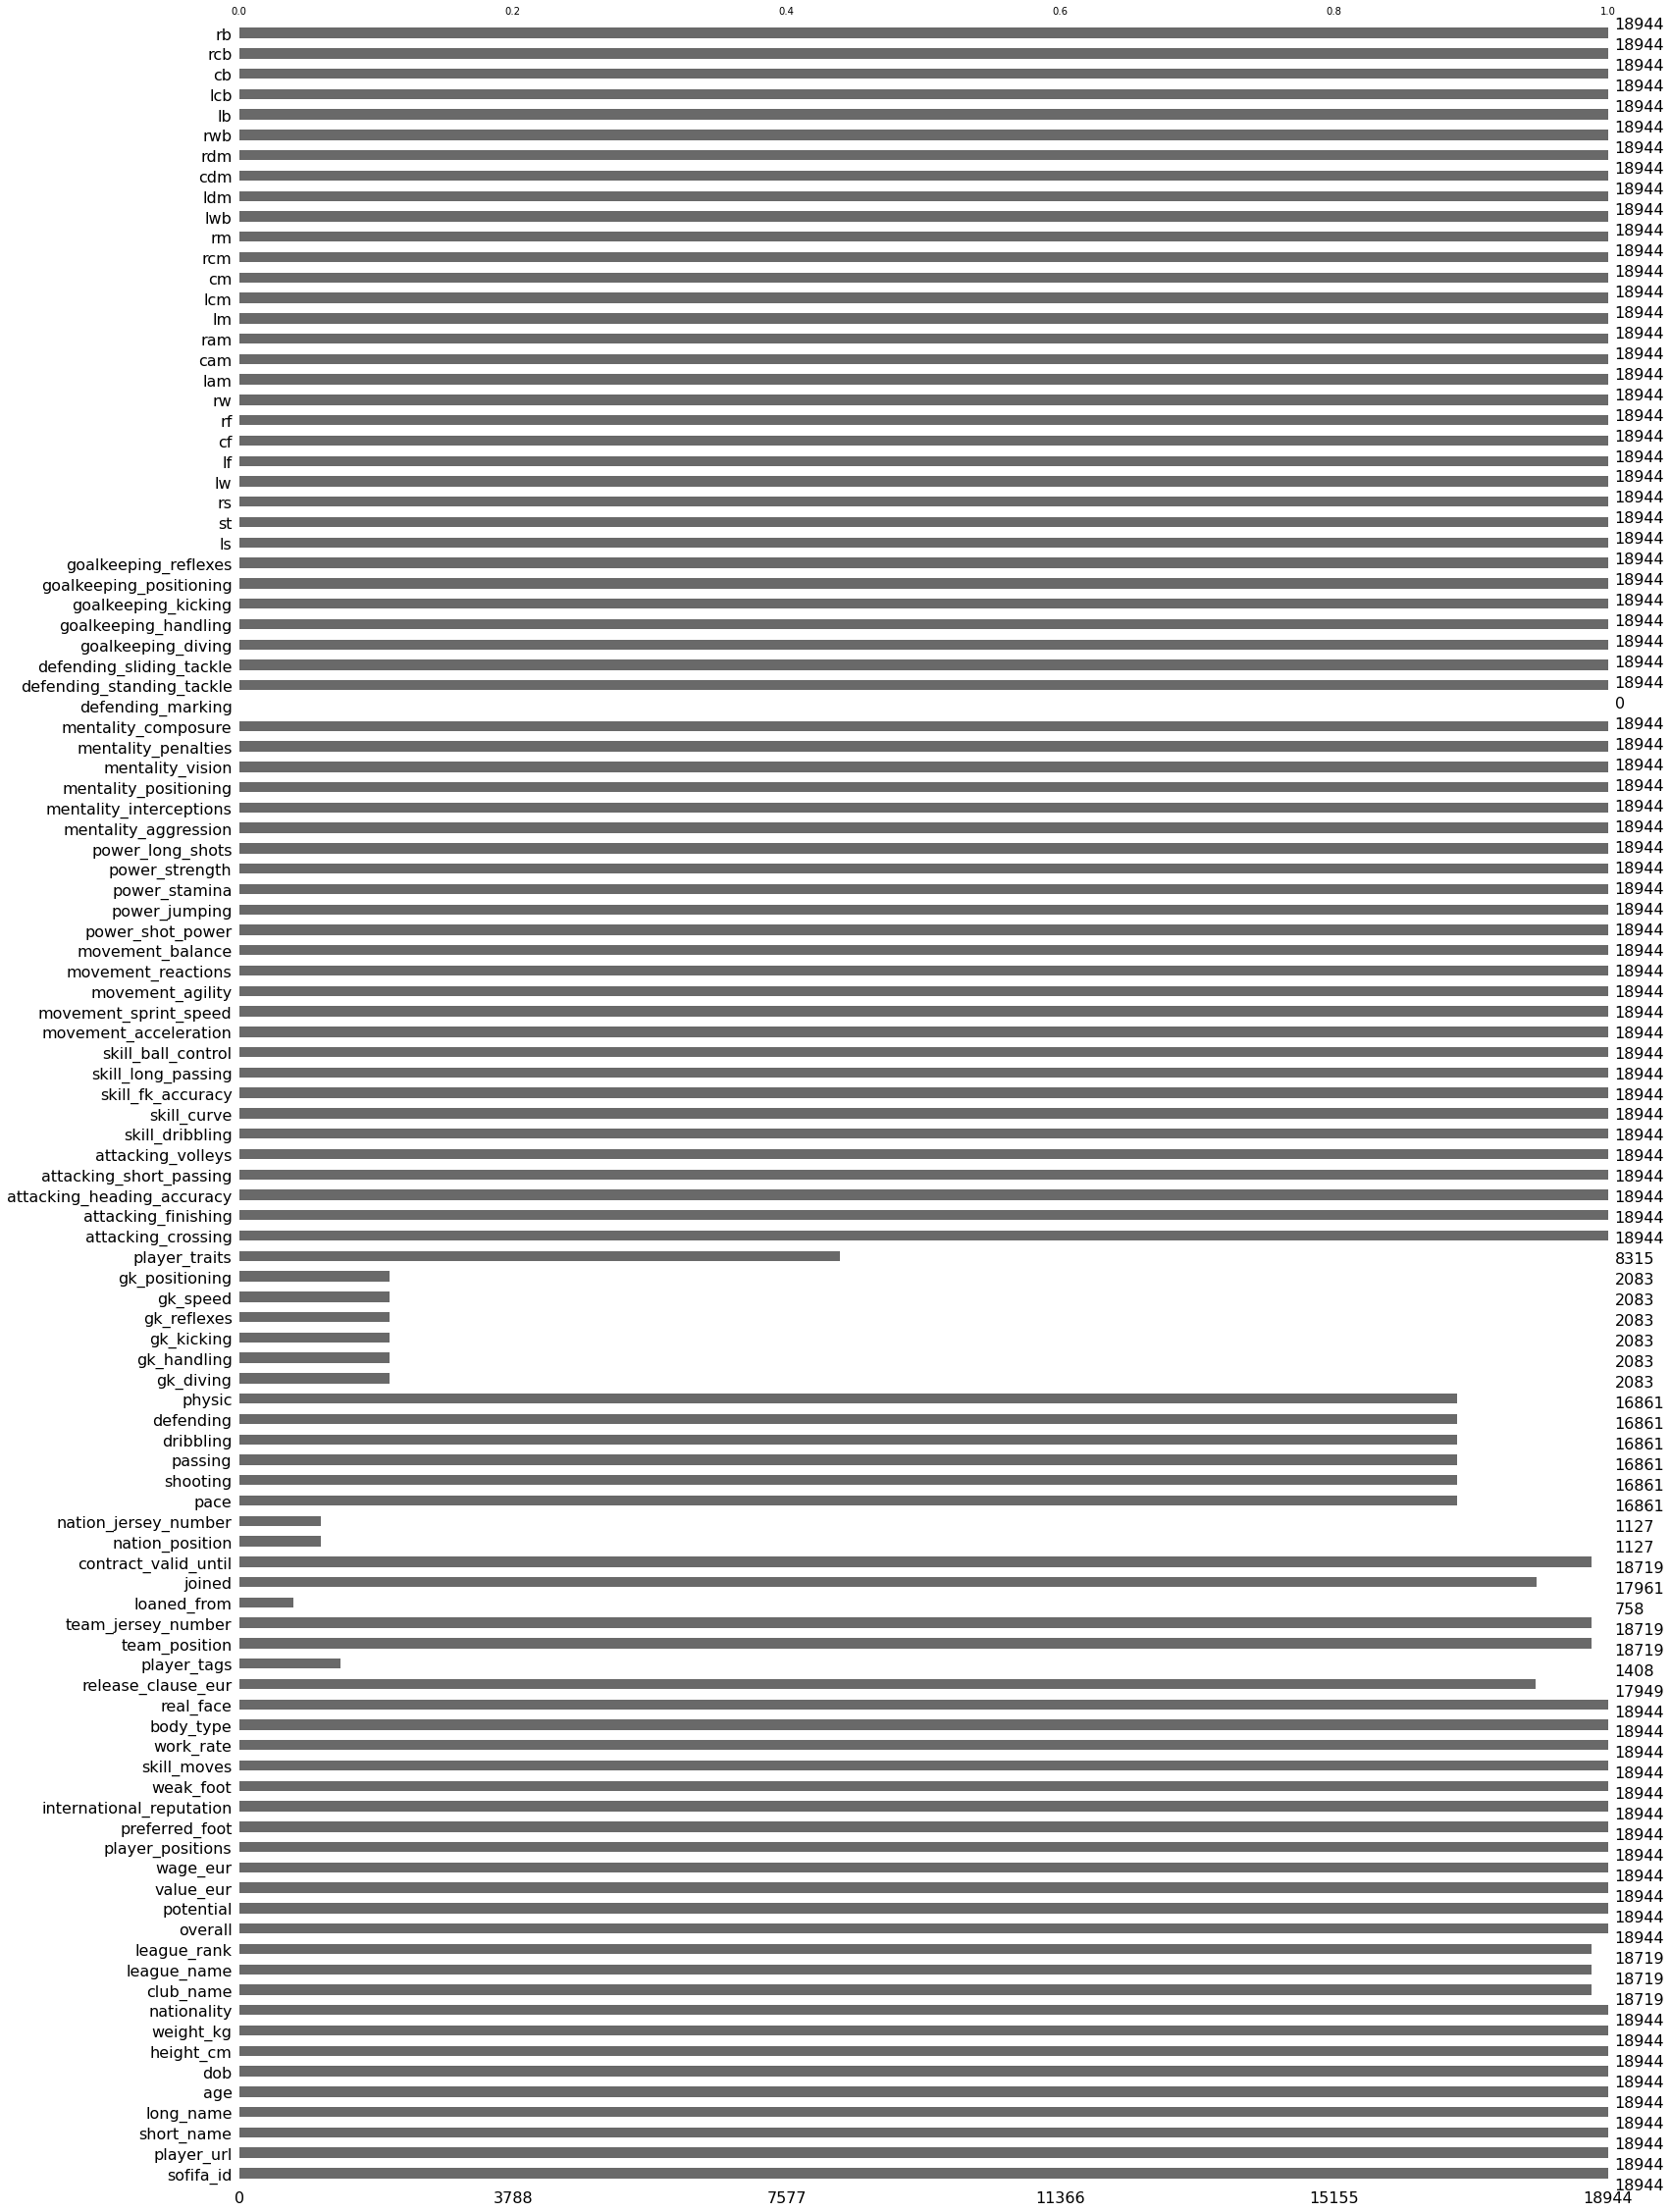

In [105]:
msno.bar(df)

<AxesSubplot:>

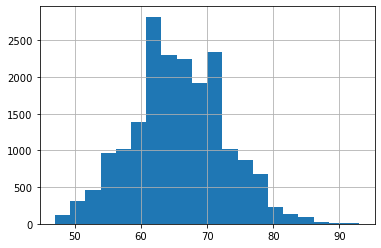

In [106]:
#quitar defending_marking 
df["overall"].hist(bins=20)

In [107]:
positions = ["sofifa_id",'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 
             'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [108]:
a = df[positions]

In [109]:
def cleanPos(x):
    return x.str[:-2]

b = a.apply(cleanPos, axis=1)

In [110]:
b

sofifa_id  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  cm rcm  \
0            NaN  89  89  89  92  93  93  93  92  93  93  93  91  87  87  87   
1            NaN  91  91  91  89  91  91  91  89  88  88  88  88  81  81  81   
2            NaN  33  33  33  32  35  35  35  32  38  38  38  35  38  38  38   
3            NaN  89  89  89  85  87  87  87  85  85  85  85  83  79  79  79   
4            NaN  84  84  84  90  89  89  89  90  90  90  90  90  83  83  83   
...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
18939        NaN  44  44  44  47  45  45  45  47  47  47  47  48  47  47  47   
18940        NaN  32  32  32  30  30  30  30  30  29  29  29  31  32  32  32   
18941        NaN  34  34  34  33  33  33  33  33  33  33  33  35  35  35  35   
18942        NaN  44  44  44  46  45  45  45  46  47  47  47  47  47  47  47   
18943        NaN  46  46  46  47  46  46  46  47  47  47  47   4  47  47  47   

       rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0      91  66  65  65  65  66  62  52  52  52  62  
1      88  65  61  61  61  65  61  54  54  54  61  
2      35  32  36  36  36  32  32  33  33  33  32  
3      83  64  65  65  65  64  61  60  60  60  61  
4      90  67  62  62  62  67  62  49  49  49  62  
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
18939  48  47  47  47  47  47  47  46  46  46  47  
18940  31  42  41  41  41  42  45  47  47  47  45  
18941  35  42  42  42  42  42  44  47  47  47  44  
18942  47  47  49  49  49  47  47  49  49  49  47  
18943   4  47  47  47  47  47  47  46  46  46  47  

[18944 rows x 27 columns]

In [111]:
b = b.apply(pd.to_numeric)
b["max"] = b[b.columns.difference(["sofifa_id"])].idxmax(axis=1)
b

sofifa_id  ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  cm  \
0            NaN  89  89  89  92  93  93  93  92   93   93   93  91   87  87   
1            NaN  91  91  91  89  91  91  91  89   88   88   88  88   81  81   
2            NaN  33  33  33  32  35  35  35  32   38   38   38  35   38  38   
3            NaN  89  89  89  85  87  87  87  85   85   85   85  83   79  79   
4            NaN  84  84  84  90  89  89  89  90   90   90   90  90   83  83   
...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ..  ...  ..   
18939        NaN  44  44  44  47  45  45  45  47   47   47   47  48   47  47   
18940        NaN  32  32  32  30  30  30  30  30   29   29   29  31   32  32   
18941        NaN  34  34  34  33  33  33  33  33   33   33   33  35   35  35   
18942        NaN  44  44  44  46  45  45  45  46   47   47   47  47   47  47   
18943        NaN  46  46  46  47  46  46  46  47   47   47   47   4   47  47   

       rcm  rm  lwb  ldm  cdm  rdm  rwb  lb  lcb  cb  rcb  rb  max  
0       87  91   66   65   65   65   66  62   52  52   52  62  cam  
1       81  88   65   61   61   61   65  61   54  54   54  61   cf  
2       38  35   32   36   36   36   32  32   33  33   33  32  cam  
3       79  83   64   65   65   65   64  61   60  60   60  61   ls  
4       83  90   67   62   62   62   67  62   49  49   49  62  cam  
...    ...  ..  ...  ...  ...  ...  ...  ..  ...  ..  ...  ..  ...  
18939   47  48   47   47   47   47   47  47   46  46   46  47   lm  
18940   32  31   42   41   41   41   42  45   47  47   47  45   cb  
18941   35  35   42   42   42   42   42  44   47  47   47  44   cb  
18942   47  47   47   49   49   49   47  47   49  49   49  47   cb  
18943   47   4   47   47   47   47   47  47   46  46   46  47  cam  

[18944 rows x 28 columns]

In [112]:
b["max"] = b["max"].str.upper()

In [113]:
b

sofifa_id  ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  cm  \
0            NaN  89  89  89  92  93  93  93  92   93   93   93  91   87  87   
1            NaN  91  91  91  89  91  91  91  89   88   88   88  88   81  81   
2            NaN  33  33  33  32  35  35  35  32   38   38   38  35   38  38   
3            NaN  89  89  89  85  87  87  87  85   85   85   85  83   79  79   
4            NaN  84  84  84  90  89  89  89  90   90   90   90  90   83  83   
...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ..  ...  ..   
18939        NaN  44  44  44  47  45  45  45  47   47   47   47  48   47  47   
18940        NaN  32  32  32  30  30  30  30  30   29   29   29  31   32  32   
18941        NaN  34  34  34  33  33  33  33  33   33   33   33  35   35  35   
18942        NaN  44  44  44  46  45  45  45  46   47   47   47  47   47  47   
18943        NaN  46  46  46  47  46  46  46  47   47   47   47   4   47  47   

       rcm  rm  lwb  ldm  cdm  rdm  rwb  lb  lcb  cb  rcb  rb  max  
0       87  91   66   65   65   65   66  62   52  52   52  62  CAM  
1       81  88   65   61   61   61   65  61   54  54   54  61   CF  
2       38  35   32   36   36   36   32  32   33  33   33  32  CAM  
3       79  83   64   65   65   65   64  61   60  60   60  61   LS  
4       83  90   67   62   62   62   67  62   49  49   49  62  CAM  
...    ...  ..  ...  ...  ...  ...  ...  ..  ...  ..  ...  ..  ...  
18939   47  48   47   47   47   47   47  47   46  46   46  47   LM  
18940   32  31   42   41   41   41   42  45   47  47   47  45   CB  
18941   35  35   42   42   42   42   42  44   47  47   47  44   CB  
18942   47  47   47   49   49   49   47  47   49  49   49  47   CB  
18943   47   4   47   47   47   47   47  47   46  46   46  47  CAM  

[18944 rows x 28 columns]

In [114]:
df = pd.concat([df, b["max"]], axis=1)

In [115]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   33   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35   
2               J. Oblak                            Jan Oblak   27   
3         R. Lewandowski                   Robert Lewandowski   31   
4              Neymar Jr        Neymar da Silva Santos Júnior   28   
...                  ...                                  ...  ...   
18939          K. Angulo                         Kevin Angulo   24   
18940     Zhang Mengxuan                       Mengxuan Zhang   21   
18941      Wang Zhenghao                                  王政豪   20   
18942        Chen Zitong                          Zitong Chen   23   
18943           Song Yue                             Yue Song   28   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1993-01-07        188         87    Slovenia   
3      1988-08-21        184         80      Poland   
4      1992-02-05        175         68      Brazil   
...           ...        ...        ...         ...   
18939  1996-04-13        176         73    Colombia   
18940  1999-04-26        177         70    China PR   
18941  2000-06-28        185         74    China PR   
18942  1997-02-20        186         80    China PR   
18943  1991-11-20        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 Juventus          Italian Serie A   
2                          Atlético Madrid   Spain Primera Division   
3                        FC Bayern München     German 1. Bundesliga   
4                      Paris Saint-Germain           French Ligue 1   
...                                    ...                      ...   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       league_rank  overall  potential  value_eur  wage_eur player_positions  \
0              1.0       93         93   67500000    560000       RW, ST, CF   
1              1.0       92         92   46000000    220000           ST, LW   
2              1.0       91         93   75000000    125000               GK   
3              1.0       91         91   80000000    240000               ST   
4              1.0       91         91   90000000    270000          LW, CAM   
...            ...      ...        ...        ...       ...              ...   
18939          1.0       47         52      40000       500               CM   
18940          1.0       47         52      35000      1000               CB   
18941          1.0       47         51      35000      1000               CB   

Retiramos jugadores con bajo desempeño promedio (atributo "overall") y reducimos la cantidad.

In [116]:
n = 10000
dfNew = df.loc[:n]
dfNew = dfNew[(dfNew["overall"] > 70)]

In [117]:
dfNew

sofifa_id                                         player_url  \
0        158023  https://sofifa.com/player/158023/lionel-messi/...   
1         20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2        200389  https://sofifa.com/player/200389/jan-oblak/210002   
3        188545  https://sofifa.com/player/188545/robert-lewand...   
4        190871  https://sofifa.com/player/190871/neymar-da-sil...   
...         ...                                                ...   
4507     247671  https://sofifa.com/player/247671/bandar-al-ahb...   
4508     251122  https://sofifa.com/player/251122/mauro-fernand...   
4509     251139  https://sofifa.com/player/251139/jesus-soraire...   
4510     251503  https://sofifa.com/player/251503/mateus-pasina...   
4511     254183  https://sofifa.com/player/254183/angel-romero/...   

             short_name                              long_name  age  \
0              L. Messi         Lionel Andrés Messi Cuccittini   33   
1     Cristiano Ronaldo    Cristiano Ronaldo dos Santos Aveiro   35   
2              J. Oblak                              Jan Oblak   27   
3        R. Lewandowski                     Robert Lewandowski   31   
4             Neymar Jr          Neymar da Silva Santos Júnior   28   
...                 ...                                    ...  ...   
4507       B. Al Ahbabi  Bandar Mohammed Saeed Saleh Al Ahbabi   29   
4508       M. Fernández                   Mauro Raúl Fernández   31   
4509         J. Soraire                   Jesús Miguel Soraire   31   
4510    Mateus Pasinato                        Mateus Pasinato   28   
4511          A. Romero        Ángel Elías Romero Iparraguirre   29   

             dob  height_cm  weight_kg           nationality  \
0     1987-06-24        170         72             Argentina   
1     1985-02-05        187         83              Portugal   
2     1993-01-07        188         87              Slovenia   
3     1988-08-21        184         80                Poland   
4     1992-02-05        175         68                Brazil   
...          ...        ...        ...                   ...   
4507  1990-07-09        169         62  United Arab Emirates   
4508  1989-03-31        169         67             Argentina   
4509  1988-12-03        175         70             Argentina   
4510  1992-06-28        192         86                Brazil   
4511  1990-08-09        183         73                  Peru   

                 club_name                 league_name  league_rank  overall  \
0             FC Barcelona      Spain Primera Division          1.0       93   
1                 Juventus             Italian Serie A          1.0       92   
2          Atlético Madrid      Spain Primera Division          1.0       91   
3        FC Bayern München        German 1. Bundesliga          1.0       91   
4      Paris Saint-Germain              French Ligue 1          1.0       91   
...                    ...                         ...          ...      ...   
4507             Al Ain FC     UAE Arabian Gulf League          1.0       71   
4508             FC Juárez             Mexican Liga MX          1.0       71   
4509    Arsenal de Sarandí  Argentina Primera División          1.0       71   
4510         Moreirense FC  Portuguese Liga ZON SAGRES          1.0       71   
4511  Deportivo Binacional   Peruvian Primera División          1.0       71   

      potential  value_eur  wage_eur player_positions preferred_foot  \
0            93   67500000    560000       RW, ST, CF           Left   
1            92   46000000    220000           ST, LW          Right   
2            93   75000000    125000               GK          Right   
3            91   80000000    240000               ST          Right   
4            91   90000000    270000          LW, CAM          Right   
...         ...        ...       ...              ...            ...   
4507         71    2300000       500           RM, RB          Right   
4508  

Seleccionamos determinados atributos de los jugadores. Quitamos defending_marking por tener elevada cantidad de datos Nans

In [118]:
skills_ratings = ["pace","shooting", "passing", "dribbling","defending", "physic","gk_diving", "gk_handling","gk_kicking","gk_reflexes",
                  "gk_speed", "gk_positioning", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", 
                  "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
                  "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", 
                  "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", 
                  "power_long_shots", "defending_standing_tackle", "defending_sliding_tackle",
                  "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes"]

# "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure"

In [119]:
print("Tenemos", len(skills_ratings), "variables numéricas")

Tenemos 39 variables numéricas


Dado que tenemos muchos valores Nans distribuidos por las caracteristicas de los jugadores (ejemplo, los Nans de los atributos que comienzan por GK corresponden a las posiciones que no son arqueros), reeemplazamos dichos valores por ceros.

In [120]:
dfNew = dfNew.fillna(0)

<AxesSubplot:>

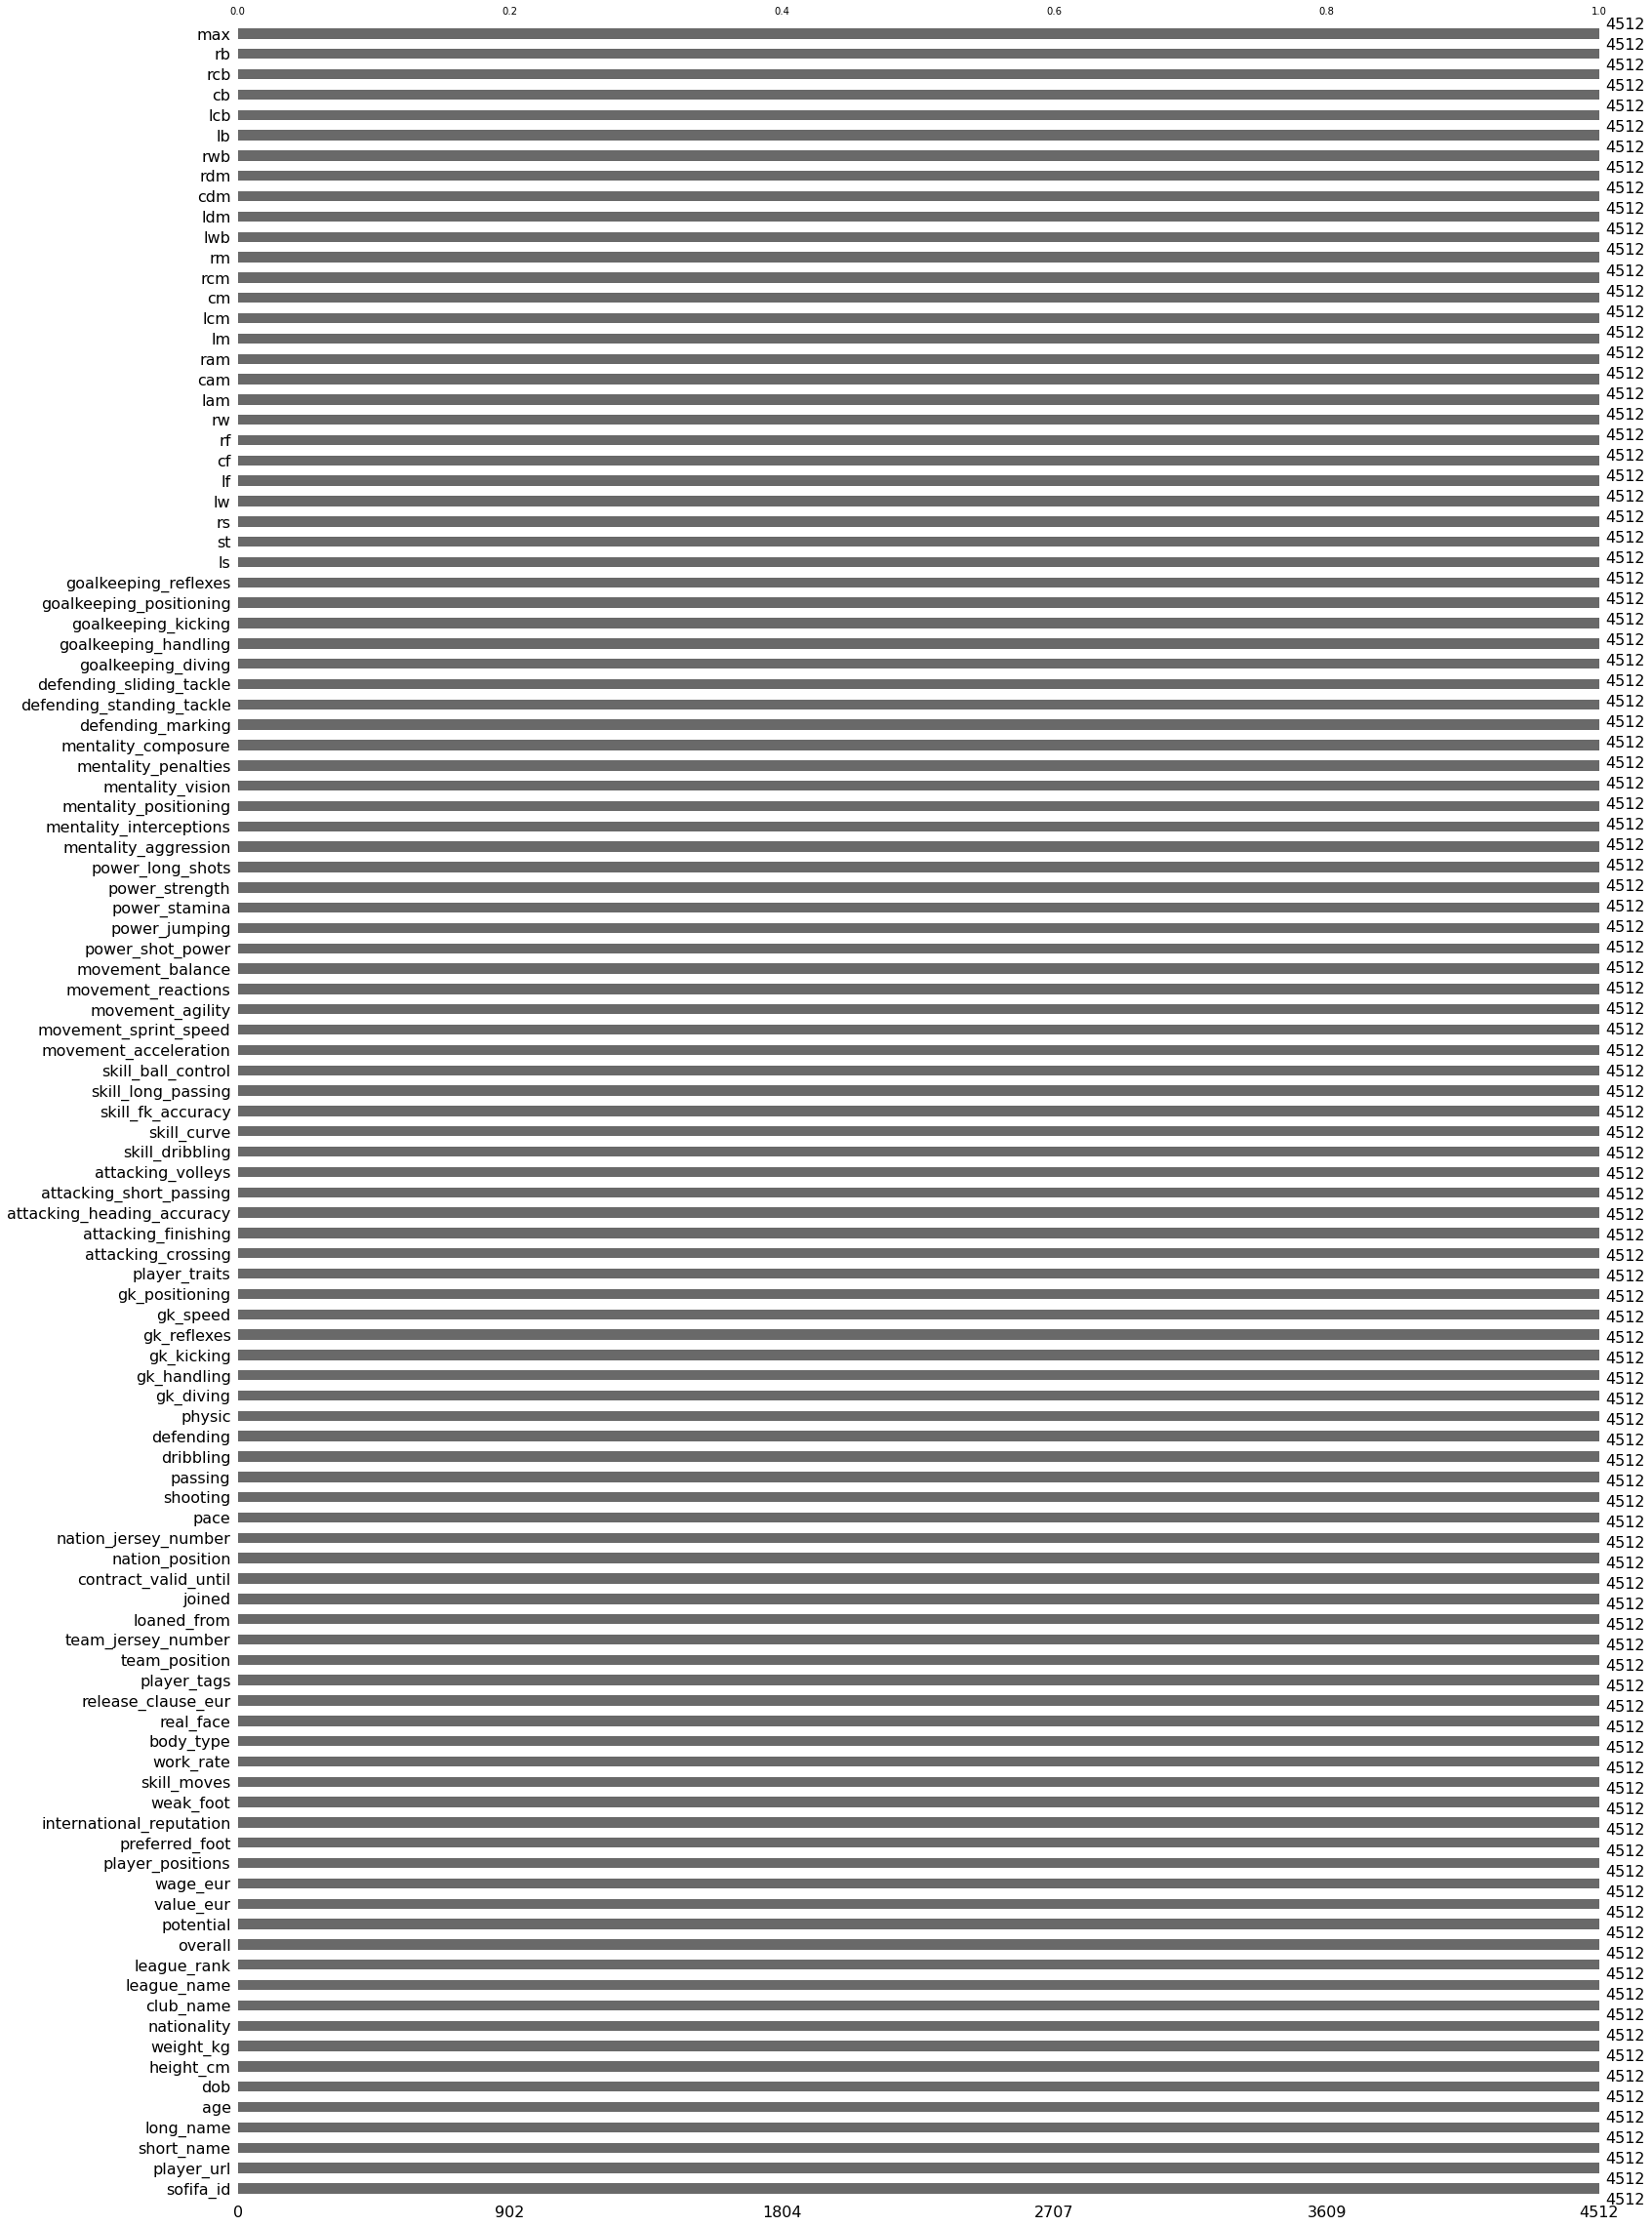

In [121]:
msno.bar(dfNew)

Creamos un jugador perfecto para conocer su ubicación en la visualización de los demás jugadores

In [122]:
elHacha={'short_name':'elHacha','overall':99}
for skills in skills_ratings:
    elHacha[skills]=99
    
dfNew = dfNew.append(elHacha,ignore_index=True)

In [123]:
df_skills = dfNew[skills_ratings]

In [124]:
df_skills.tail(4)

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
4509  76.0      61.0     71.0       75.0       62.0    83.0        0.0   
4510   0.0       0.0      0.0        0.0        0.0     0.0       71.0   
4511  67.0      68.0     70.0       73.0       61.0    75.0        0.0   
4512  99.0      99.0     99.0       99.0       99.0    99.0       99.0   

      gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
4509          0.0         0.0          0.0       0.0             0.0   
4510         72.0        71.0         67.0      21.0            71.0   
4511          0.0         0.0          0.0       0.0             0.0   
4512         99.0        99.0         99.0      99.0            99.0   

      attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
4509                  67                   55                          51   
4510                  14                    6                          13   
4511                  59                   70                          50   
4512                  99                   99                          99   

      attacking_short_passing  attacking_volleys  skill_dribbling  \
4509                       73                 51               73   
4510                       21                  9                9   
4511                       75                 61               73   
4512                       99                 99               99   

      skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
4509           81                 63                  71                  75   
4510           14                 11                  21                  18   
4511           59                 59                  73                  74   
4512           99                 99                  99                  99   

      movement_acceleration  movement_sprint_speed  movement_agility  \
4509                     79                     73                80   
4510                     28                     16                21   
4511                     66                     67                74   
4512                     99                     99                99   

      movement_reactions  movement_balance  power_shot_power  power_jumping  \
4509                  71                83                75             69   
4510                  69                26                53             33   
4511                  72                69                71             76   
4512                  99                99                99             99   

      power_stamina  power_strength  power_long_shots  \
4509             88              81                61   
4510             24              60                 6   
4511             85              73                65   
4512             99              99                99   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
4509                         69                        59                  12   
4510                         14                        11                  71   
4511                         63                        66                  13   
4512                         99                        99                  99   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
4509                     9                   10                       13   
4510                    72                   71                       71   
4511                    13                    9                       13   
4512                    99                   99                       99   

      goalkeeping_reflexes  
4509                     9  
4510                    67  
4511                    16  
4512                    99

In [125]:
df_skills.describe()

pace     shooting      passing    dribbling    defending  \
count  4513.000000  4513.000000  4513.000000  4513.000000  4513.000000   
mean     63.624862    55.452471    60.294261    64.051629    53.078662   
std      23.939751    22.293030    21.382572    22.628578    24.104287   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      60.000000    47.000000    59.000000    64.000000    36.000000   
50%      70.000000    63.000000    67.000000    71.000000    64.000000   
75%      78.000000    71.000000    72.000000    76.000000    72.000000   
max      99.000000    99.000000    99.000000    99.000000    99.000000   

            physic    gk_diving  gk_handling   gk_kicking  gk_reflexes  \
count  4513.000000  4513.000000  4513.000000  4513.000000  4513.000000   
mean     63.422557     7.459118     7.170840     6.945491     7.603368   
std      22.364412    22.601832    21.736592    21.092715    23.039946   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      63.000000     0.000000     0.000000     0.000000     0.000000   
50%      70.000000     0.000000     0.000000     0.000000     0.000000   
75%      76.000000     0.000000     0.000000     0.000000     0.000000   
max      99.000000    99.000000    99.000000    99.000000    99.000000   

          gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
count  4513.000000     4513.000000         4513.000000          4513.000000   
mean      4.394859        7.358077           59.088633            54.058055   
std      13.599453       22.297997           19.169229            20.578344   
min       0.000000        0.000000            6.000000             5.000000   
25%       0.000000        0.000000           51.000000            40.000000   
50%       0.000000        0.000000           66.000000            60.000000   
75%       0.000000        0.000000           72.000000            70.000000   
max      99.000000       99.000000           99.000000            99.000000   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
count                 4513.000000              4513.000000        4513.000000   
mean                    58.790162                68.052293          51.488589   
std                     18.560701                13.963888          19.447201   
min                      7.000000                11.000000           4.000000   
25%                     51.000000                66.000000          38.000000   
50%                     63.000000                72.000000          56.000000   
75%                     72.000000                76.000000          67.000000   
max                     99.000000                99.000000          99.000000   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
count      4513.000000  4513.000000        4513.000000         4513.000000   
mean         64.772435    57.556393          51.056725           62.389320   
std          19.071262    19.694351          19.302794           14.432459   
min           7.000000     6.000000           7.000000            9.000000   
25%          62.000000    47.000000          37.000000           58.000000   
50%          71.000000    63.000000          54.000000           66.000000   
75%          76.000000    72.000000          67.000000           72.000000   
max          99.000000    99.000000          99.000000           99.000000   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
count         4513.000000            4513.000000            4513.000000   
mean            67.883226              67.981387              67.999778   
std             16.422148              14.548132              14.311806   
min              5.000000              17.000000              15.000000   
25%             67.000000              60.000000              61.000000   
50%             73.000000              70.000000              70.000000   
75%       

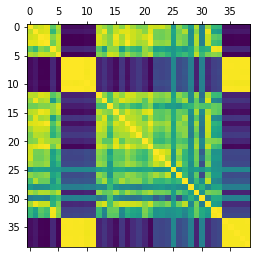

In [126]:
corr = df_skills.corr(method="pearson")
plt.matshow(corr)
plt.show()

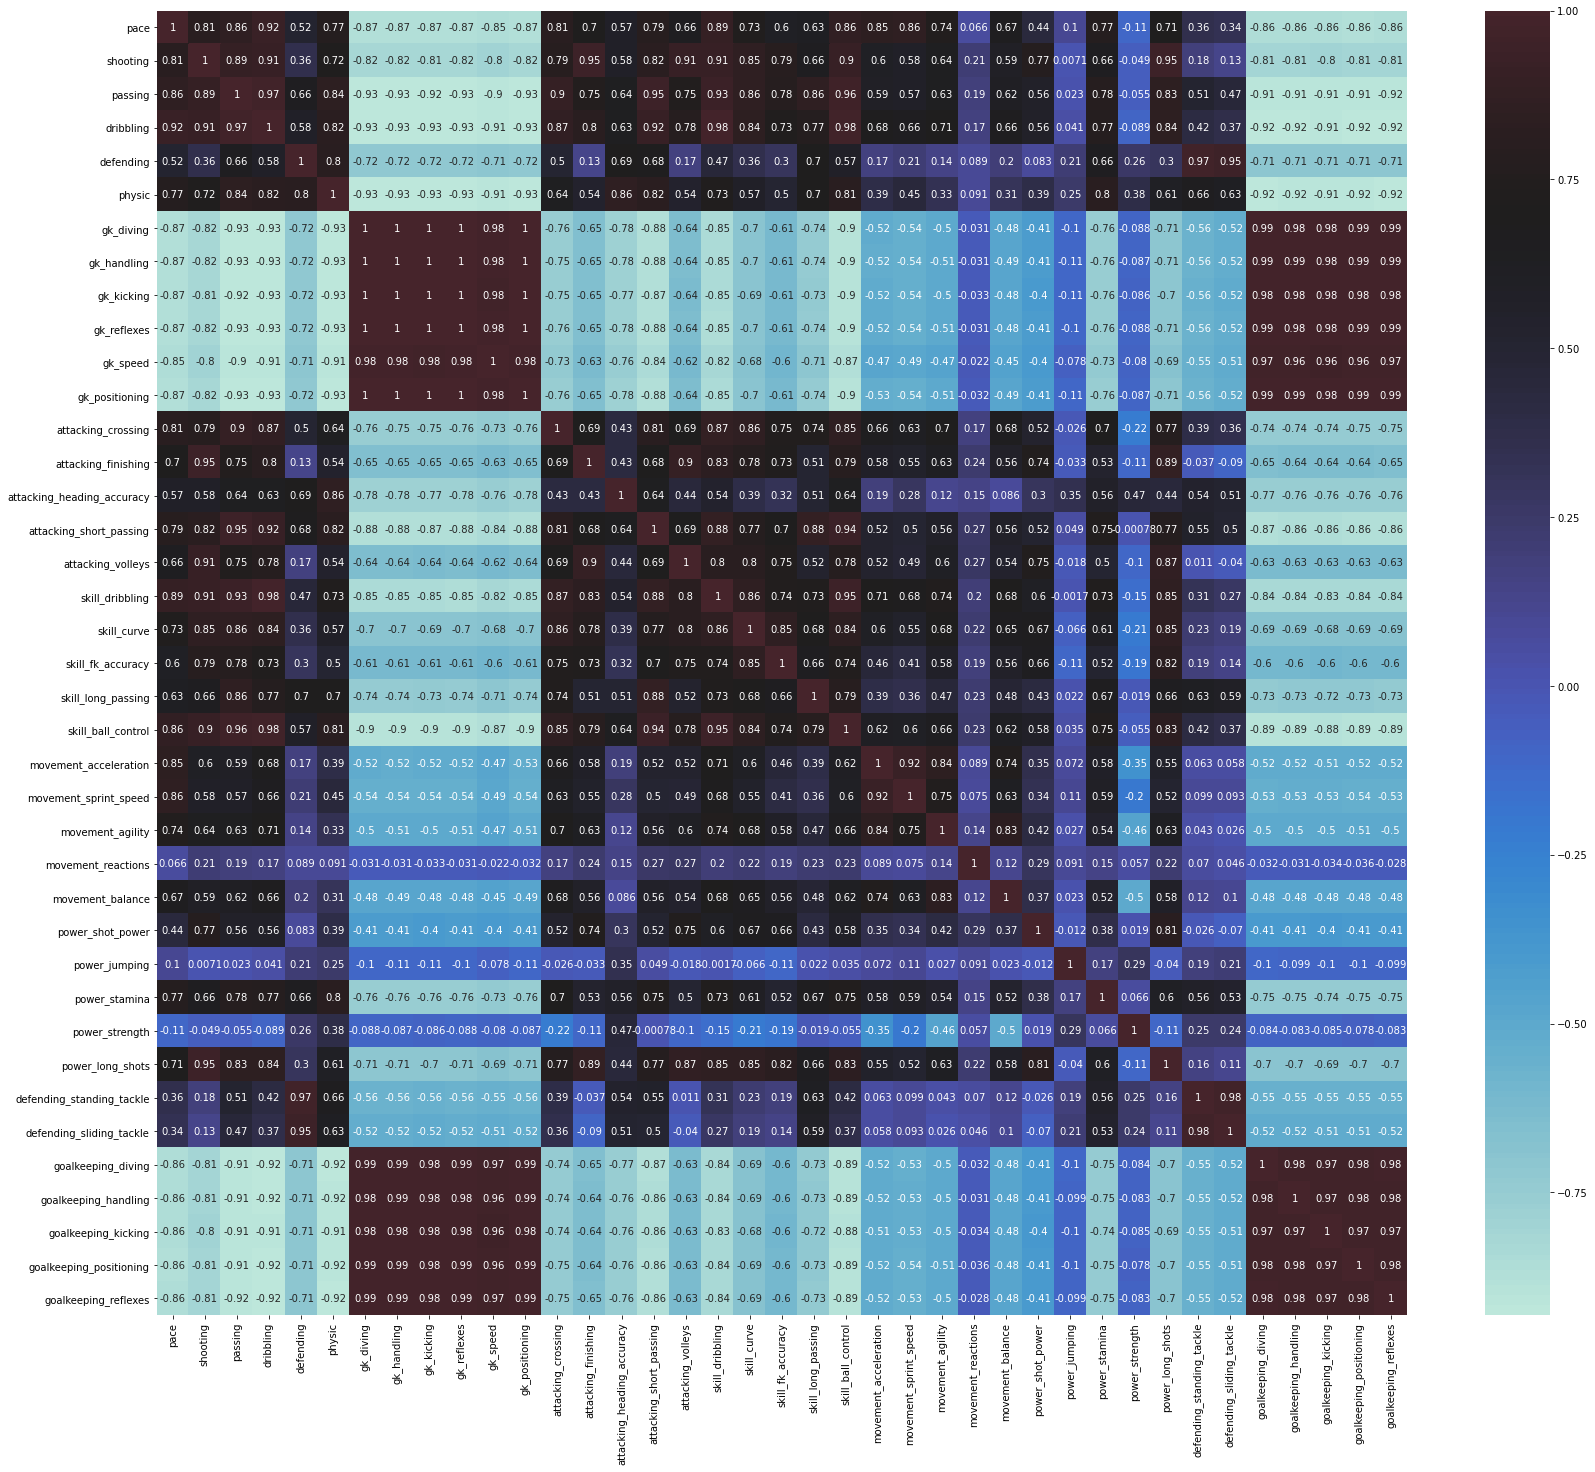

In [127]:
plt.figure(figsize=(28, 24))
sns.heatmap(corr, annot=True, center=0.7)
plt.show()

# mAnalizar que variables no pueden describir el dataset para que luego funcione kmeans shift

In [128]:
dfNew.head()

sofifa_id                                         player_url  \
0   158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1    20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2   200389.0  https://sofifa.com/player/200389/jan-oblak/210002   
3   188545.0  https://sofifa.com/player/188545/robert-lewand...   
4   190871.0  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name   age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini  33.0  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro  35.0  1985-02-05   
2           J. Oblak                            Jan Oblak  27.0  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski  31.0  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior  28.0  1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0      170.0       72.0   Argentina         FC Barcelona   
1      187.0       83.0    Portugal             Juventus   
2      188.0       87.0    Slovenia      Atlético Madrid   
3      184.0       80.0      Poland    FC Bayern München   
4      175.0       68.0      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential   value_eur  \
0  Spain Primera Division          1.0       93       93.0  67500000.0   
1         Italian Serie A          1.0       92       92.0  46000000.0   
2  Spain Primera Division          1.0       91       93.0  75000000.0   
3    German 1. Bundesliga          1.0       91       91.0  80000000.0   
4          French Ligue 1          1.0       91       91.0  90000000.0   

   wage_eur player_positions preferred_foot  international_reputation  \
0  560000.0       RW, ST, CF           Left                       5.0   
1  220000.0           ST, LW          Right                       5.0   
2  125000.0               GK          Right                       3.0   
3  240000.0               ST          Right                       4.0   
4  270000.0          LW, CAM          Right                       5.0   

   weak_foot  skill_moves      work_rate             body_type real_face  \
0        4.0          4.0     Medium/Low                 Messi       Yes   
1        4.0          5.0       High/Low            C. Ronaldo       Yes   
2        3.0          1.0  Medium/Medium  PLAYER_BODY_TYPE_259       Yes   
3        4.0          4.0    High/Medium  PLAYER_BODY_TYPE_276       Yes   
4        5.0          5.0    High/Medium                Neymar       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2         159400000.0                                                  0   
3         132000000.0              #Distance Shooter, #Clinical Finisher   
4         166500000.0  #Speedster, #Dribbler, #Playmaker, #FK Special...   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0           0  2004-07-01   
1            LS                 7.0           0  2018-07-10   
2            GK                13.0           0  2014-07-16   
3            ST                 9.0           0  2014-07-01   
4            LW                10.0           0  2017-08-03   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
2                2023.0              GK                   1.0   0.0       0.0   
3                2023.0               0                   0.0  78.0      91.0   
4                2022.0               0                   0.0  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.

## Exploratorio - Visual para Clustering

Vamos realizando la exploración de a 2 grupos

In [129]:
#data=[]
bool_crack = dfNew["overall"] > 85 #diferenciamos a los mejores jugadores

#Elegimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[20]
skill_2=skills_ratings[22]

In [130]:
len(bool_crack)

4513

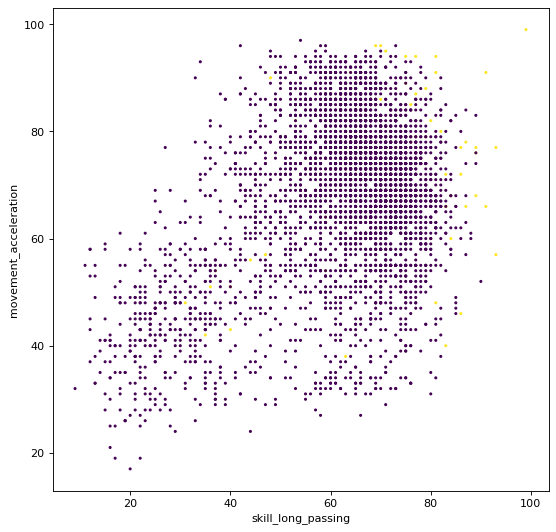

In [131]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack)
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [132]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=dfNew.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=dfNew.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=700)

fig = go.Figure(data=data, layout=layout)

In [133]:
#En Colab
#fig.show(renderer="colab")

#En Jupyter Ntb abre en otra ventana, 
plot(fig)

'temp-plot.html'

In [134]:
#P/Gráfico 2

#Elegimos un jugador
recherche_joueur=dfNew["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 

bool_crack = dfNew["overall"] > 85
bool_elecc = dfNew["club_name"]=='FC Barcelona' 
bool_no_crack = dfNew["overall"]<86
bool_machinegun = dfNew["short_name"]=='elHacha'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[20]  #6
skill_2=skills_ratings[22]  #25

In [135]:
palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=dfNew.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=dfNew.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=dfNew.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=dfNew.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)


In [136]:
#En Colab
#fig.show(renderer="colab")

#En Jupyter Ntb abre en otra ventana, 
plot(fig)

'temp-plot.html'

# De acuerdo a Notebook 2

## Clustering con K-means
Definimos los parámetros de números de clusters buscados.

In [137]:
df_skills.drop(df_skills.tail(1).index,inplace=True) # drop last n rows
dfNew.drop(dfNew.tail(1).index,inplace=True) # drop last n rows

In [138]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust_3 = 3
n_clust_6 = 6

km_3 = KMeans(n_clusters = n_clust_3)
km_6 = KMeans(n_clusters = n_clust_6)
km_3.fit(df_skills) 
km_6.fit(df_skills) 

# Recuperacion de etiquetas
clusters_3 = km_3.labels_
clusters_6 = km_6.labels_


print('Suma de los cuadrados de las distancias al cluster (3) = Inertia = ', km_3.inertia_)
print('Suma de los cuadrados de las distancias al cluster (6) = Inertia = ', km_6.inertia_)

Suma de los cuadrados de las distancias al cluster (3) = Inertia =  13296427.3347338
Suma de los cuadrados de las distancias al cluster (6) = Inertia =  8584791.651739739


Si bien contamos con menor inertia cuando elegimos 6 clusters, veremos si es buena decisión elegir esa cantidad de centroides. 

Observamos los 3 centroides que encuentra el primer modelo. Dado que corremos el proceso con 39 dimensiones, no es posible realizar un gráfico del mismo.

In [139]:
km_3.cluster_centers_

array([[ 7.51617647e+01,  7.16250000e+01,  6.93891807e+01,
         7.58933824e+01,  4.33329832e+01,  6.61481092e+01,
         1.24344979e-14, -4.44089210e-14, -3.37507799e-14,
         4.26325641e-14,  2.66453526e-15, -1.24344979e-14,
         6.71754202e+01,  7.15141807e+01,  5.97857143e+01,
         7.27841387e+01,  6.68571429e+01,  7.60682773e+01,
         6.92956933e+01,  6.23597689e+01,  6.44375000e+01,
         7.62232143e+01,  7.56759454e+01,  7.47415966e+01,
         7.65246849e+01,  7.28750000e+01,  7.32584034e+01,
         7.47295168e+01,  6.60073529e+01,  7.14359244e+01,
         6.56869748e+01,  7.04805672e+01,  4.14873950e+01,
         3.72032563e+01,  1.05540966e+01,  1.06407563e+01,
         1.06554622e+01,  1.04795168e+01,  1.04532563e+01],
       [ 6.39488462e-14,  3.55271368e-14, -7.10542736e-15,
        -2.84217094e-14, -7.10542736e-15,  7.81597009e-14,
         7.55945946e+01,  7.26644144e+01,  7.03738739e+01,
         7.70608108e+01,  4.44481982e+01,  7.45675676e+

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

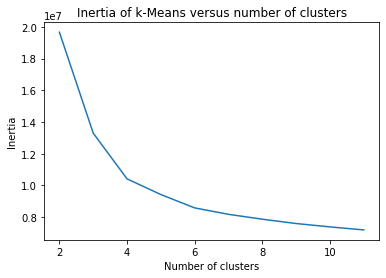

In [140]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

La inercia es una métrica utilizada en estas aplicaciones, pero tiene su falencia dado que a medida que aumentamos el número de clusters, la métrica también se reduce (en términos absolutos). Una manera de elegir la cantidad de centroides es el método del codo. Al observar el gráfico vemos que en 4 y 6 se produce un "quiebre" de la tendencia de descenso, por lo que elegimos entre dichos valores el objetivo de elección de centroide. 

La métrica silhouette es una mejor métrica, pero sólo sirve para comparar 2 dimensiones de datos. 

**Elegiremos 2 variables y realizaremos la gráfica utilizando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [141]:
bool_crack = dfNew["overall"] > 85
bool_no_crack = dfNew["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1 = skills_ratings[12]
skill_2 = skills_ratings[15]

In [142]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=dfNew.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Cracks!!',
                      text=dfNew.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

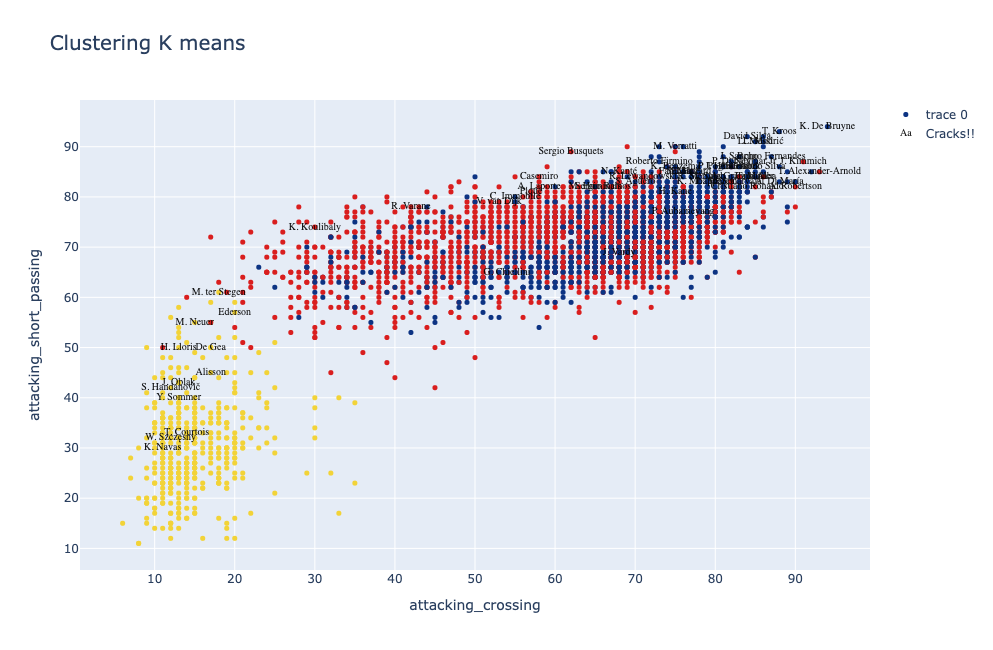

In [143]:
#En Colab:
#fig.show(renderer="colab")
#En Jupyter:
iplot(fig)
#plot(fig)

In [144]:
df_clusters = dfNew.copy()
df_clusters['kmeans'] = km_3.labels_ #clusters
print('Kmeans encontró: ', max(km_3.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


## A continuación graficaremos y conoceremos la métrica Silhouette eligiendo las 2 variables seleccionadas anteriormente. Diagrama de Silhouette con diferentes valores de cluster

For n_clusters = 2 The average silhouette_score is : 0.6997387862373423
For n_clusters = 4 The average silhouette_score is : 0.4107052900797764
For n_clusters = 6 The average silhouette_score is : 0.39253946149983765
For n_clusters = 8 The average silhouette_score is : 0.35451989655128485
For n_clusters = 20 The average silhouette_score is : 0.3320694943362136
For n_clusters = 40 The average silhouette_score is : 0.328347717199545


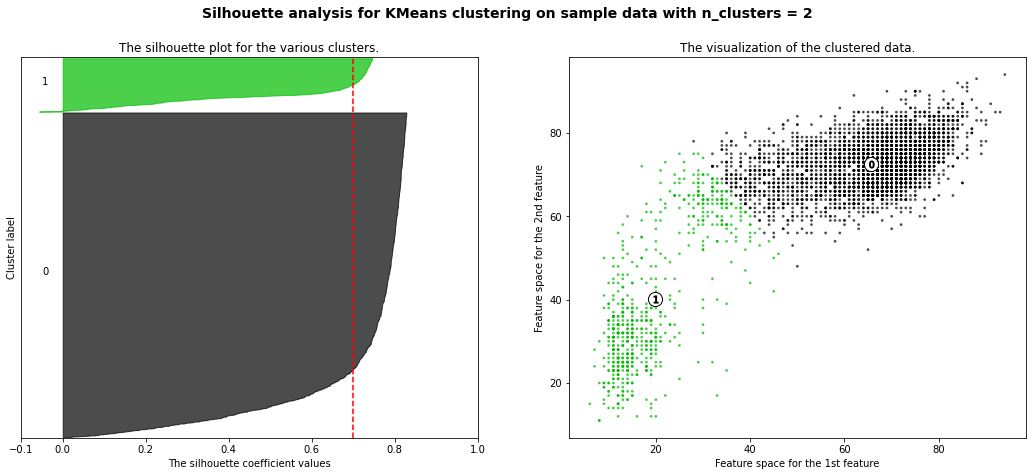

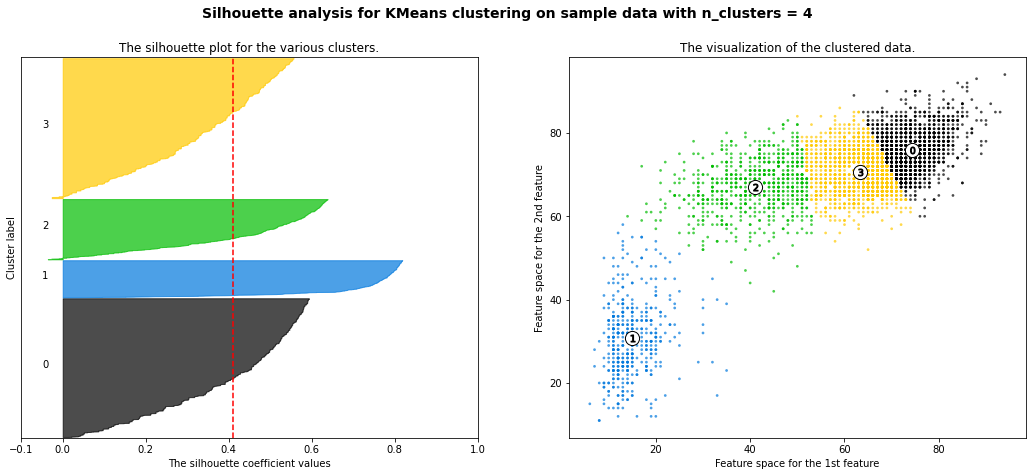

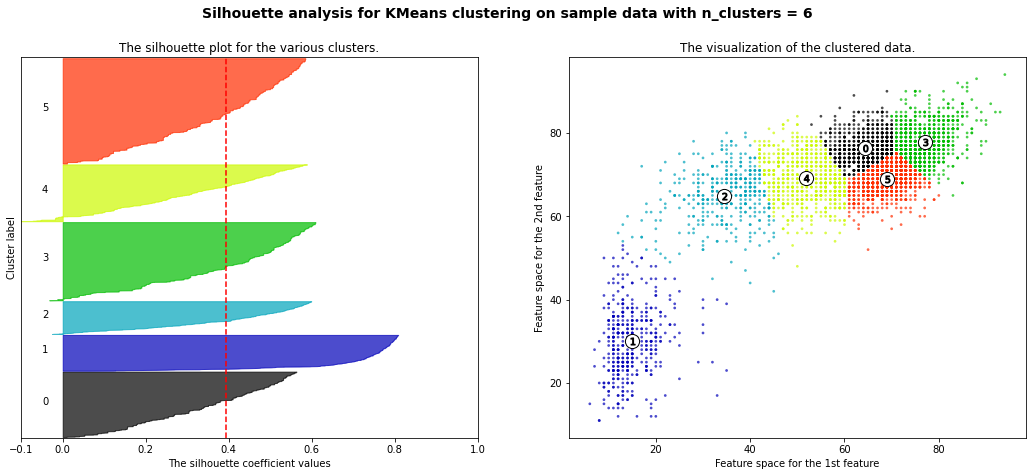

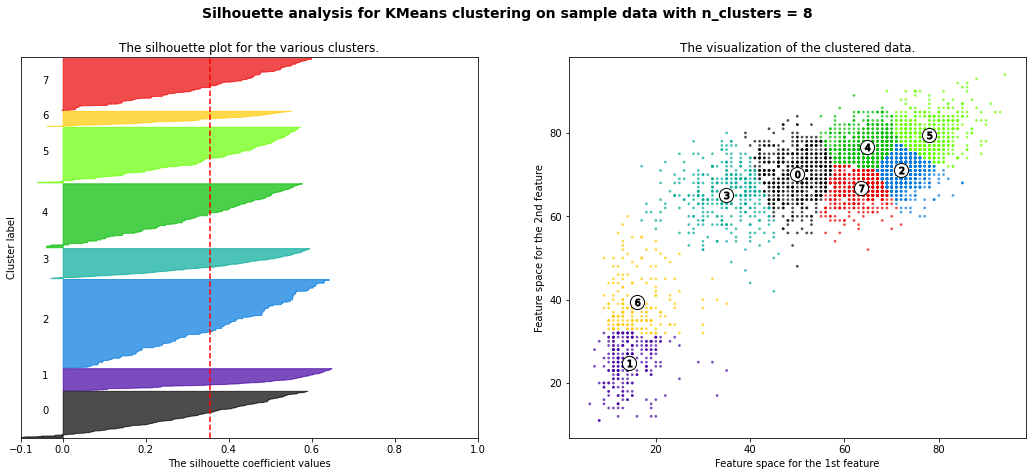

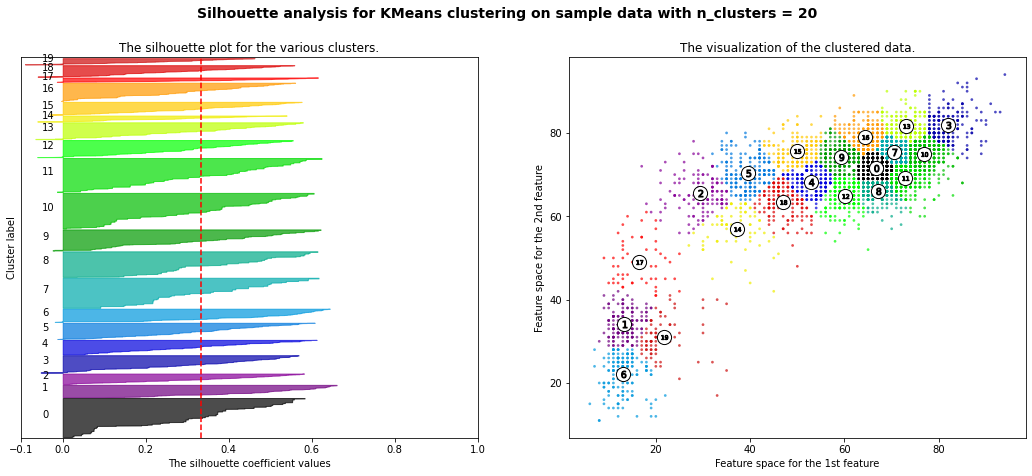

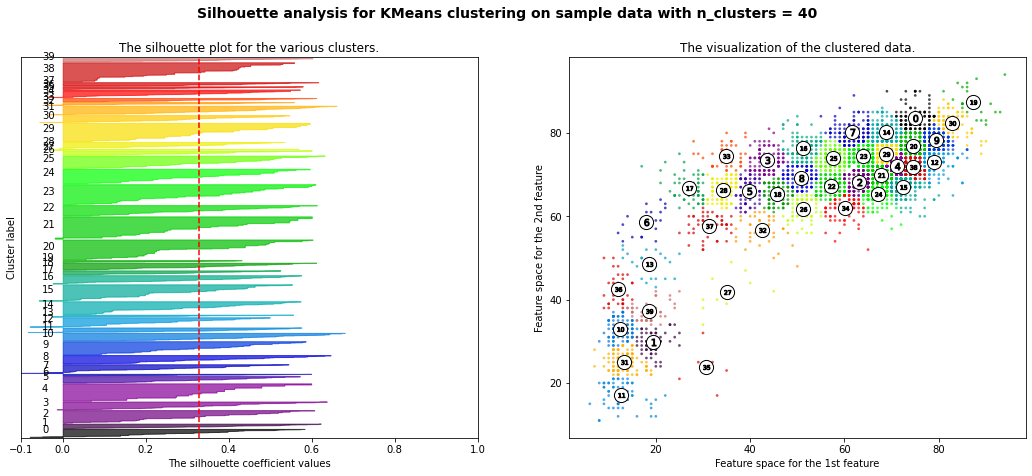

In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


#Adecuaciones para realizar gráfico Silhouette 
a = np.array(df_skills[skill_1].astype("int"))
b = np.array(df_skills[skill_2].astype("int"))
f = pd.DataFrame(a,b)
f[1] = f.index
f.index.name=None
f =f.reset_index()
f = f.drop(["index"], axis=1)
g = f.to_numpy()


X, y = g, clusters_3 # For reproducibility

range_n_clusters = [2, 4, 6, 8 ,20 ,40]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    
plt.show()

## Reflexiones del Diagrama de Slihouette. 

Luego de ver los valores de Silhouette para diferentes cantidades de clústers podemos mencionar que: 
* Para clusters = 2 si bien los grupos se encuentran por encima del promedio de silhuette, el grupo 0 es mucho mas grande que el 1, por lo que se descarta dicha elección. 
* En el caso de clusters = 4, que con el método del codo nos daba bien, observamos 2 grupos grandes y 2 grupos mas chicos en cantidad de datos; los 4 grupos por encima de la media
* Con clusters = 8 observamos que 2 (y tambien 3) grupos que son chicos relativamente a los demás, aunque todos por encima del valor de silueta medio (linea punteada)
* Nos llamó la atención que para clusters = 20, los grupos siguen ubicandose con valores de silueta por encima del promedio, lo que significa que se encuentran cercanos a su cluster y lejanos a los demás

# 4.-Clustering-Mean-Shift 


En este método no elegimos la cantidad de clusters, pero si la cantidad de ancho de banda (hiperparametro). Dado que no encontramos a mano un valor que funcione, utilizamos la funcion 'estimate_bandwith' que calcula automáticamente dicho valor. Encontro el valor de 126,31 y 2 clusters entre los datos. 

In [146]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(df_skills, quantile=0.6)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=False)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 2


In [147]:
bandwidth

126.2859252140191

In [148]:
bool_crack=dfNew["overall"] > 85
bool_no_crack=dfNew["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[7]
skill_2=skills_ratings[20]

In [149]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=dfNew.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=dfNew.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

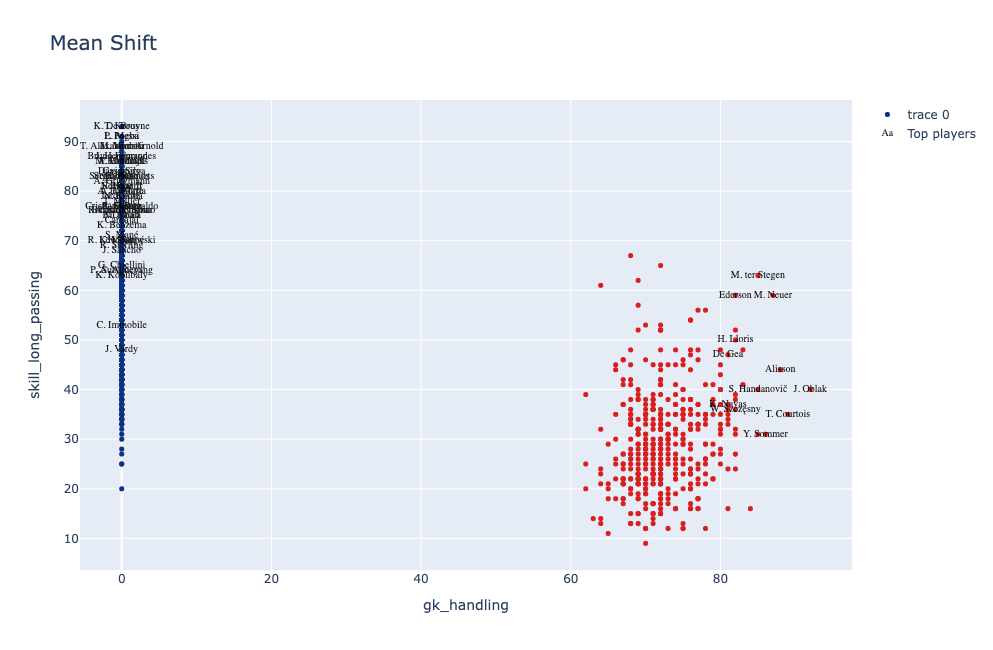

In [150]:
#En Jupyter:
iplot(fig)

### Estandarizamos los datos, y observamos en el gráfico los mismos resultados

In [151]:
from sklearn.preprocessing import normalize
normalized1 = normalize(df_skills[skill_1][:,np.newaxis], axis=0).ravel()
normalized2 = normalize(df_skills[skill_2][:,np.newaxis], axis=0).ravel()

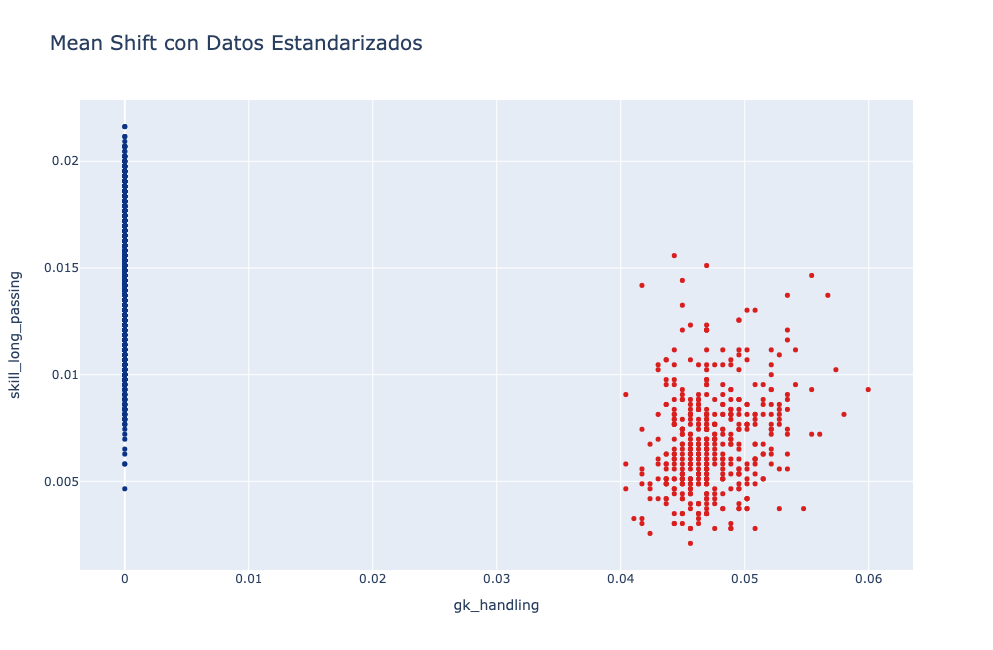

In [152]:
data=[]
MeanShift_clusters = go.Scatter(x=normalized1, y=normalized2,
                           mode='markers',
                        text=dfNew.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )


data=[MeanShift_clusters]

layout = go.Layout(title="Mean Shift con Datos Estandarizados",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=True, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

#En Jupyter:
iplot(fig)


# 5.-Clustering-con-Kmeans-sin-arqueros

In [153]:
len(dfNew)

4512

In [154]:
n=10000
dfNew_GK=df.loc[:n]
dfNew_GK=dfNew_GK[(dfNew_GK["max"]!='GK')&(dfNew_GK['overall']>69)]

skills_ratings = ["overall","pace","shooting", "passing", "dribbling","defending", "physic","attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", 
                  "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
                  "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", 
                  "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", 
                  "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", 
                  "mentality_penalties", "mentality_composure", "defending_standing_tackle", "defending_sliding_tackle",
                  "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes"]

df_skills_GK=dfNew[skills_ratings]

Eliminamos las filas que contienen datos Nan`s

In [155]:
df_skills_GK = df_skills_GK.dropna()

In [156]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_GK)

# Recuperacion de etiquetas
clusters = km.labels_

In [157]:
#data=[]
bool_crack=dfNew_GK["overall"] > 85
bool_no_crack=dfNew_GK["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]

In [158]:
kmean_clusters = go.Scatter(x=df_skills_GK[skill_1], y=df_skills_GK[skill_2],
                           mode='markers',
                        text=dfNew_GK.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_GK.loc[bool_crack,skill_1], y=df_skills_GK.loc[bool_crack,skill_2],name='Top players',
                      text=dfNew_GK.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

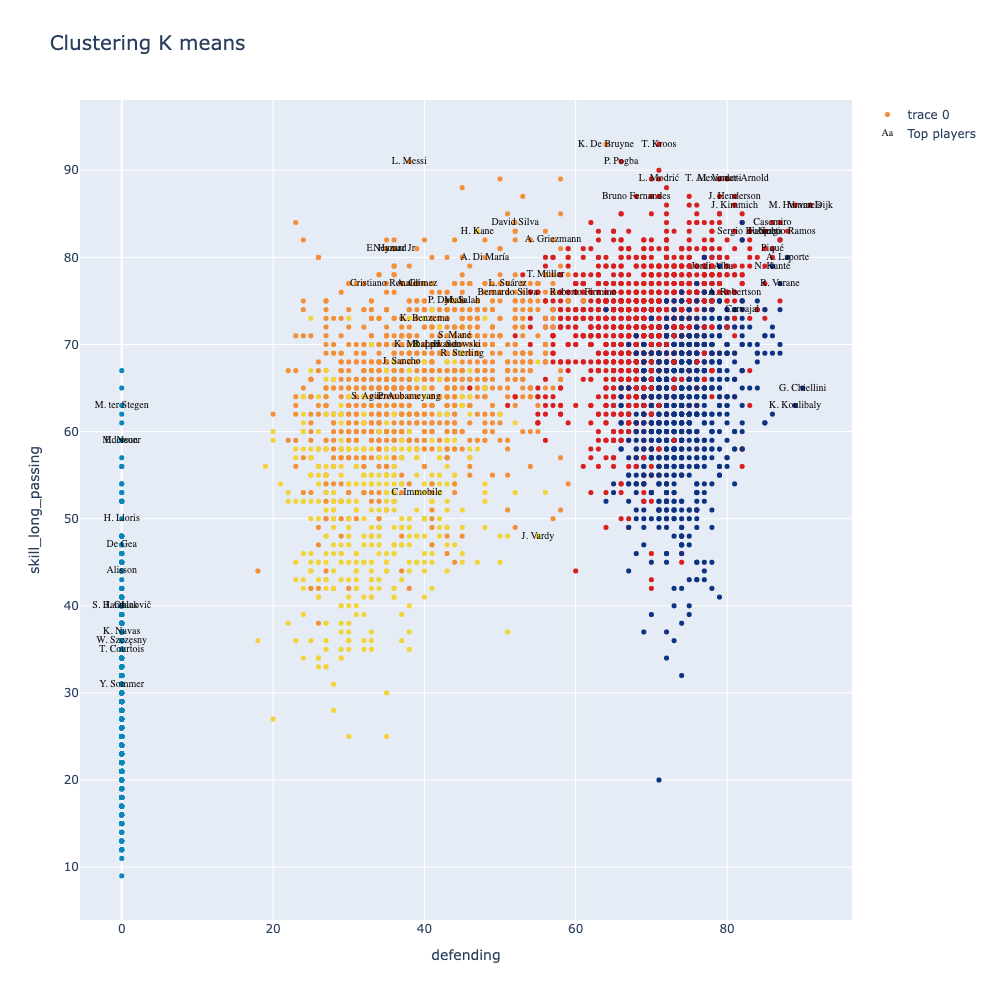

In [159]:
#En Jupyter:
iplot(fig)

# 6.-Clustering-Mean-Shift-sin-arqueros 

In [160]:
bandwidth = estimate_bandwidth(df_skills_GK, quantile=0.6)


ms = MeanShift(bandwidth=bandwidth, bin_seeding=False)
ms.fit(df_skills_GK)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 2


In [161]:
bool_crack=df_skills_GK["overall"] > 85
bool_no_crack=df_skills_GK["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[24]
skill_2=skills_ratings[26]
print(skill_1,skill_2)

power_stamina power_long_shots


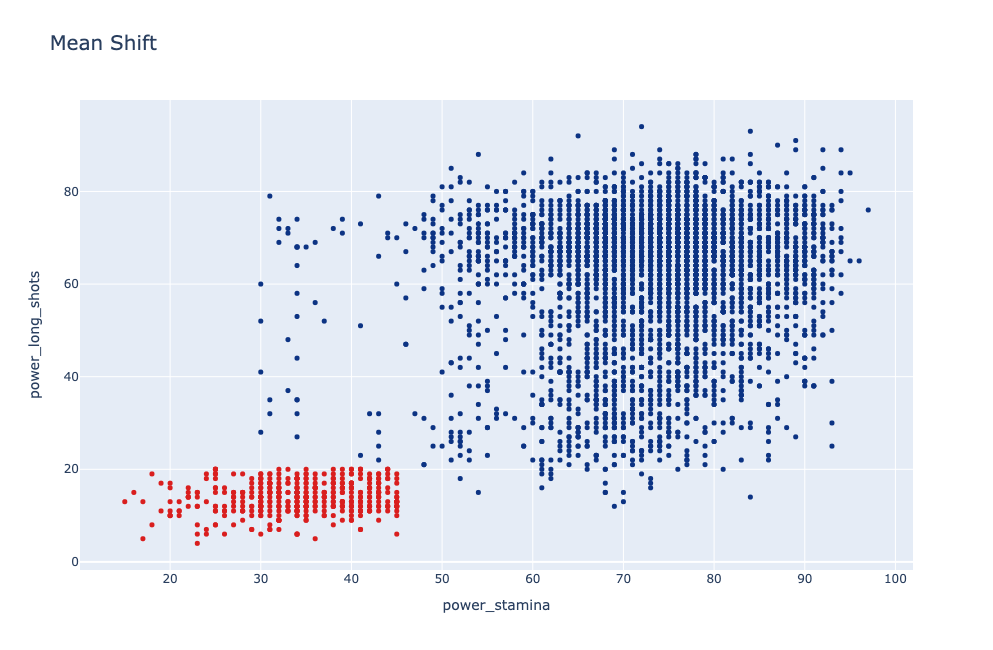

In [162]:
MeanShift_clusters = go.Scatter(x=df_skills_GK[skill_1], y=df_skills_GK[skill_2],
                                mode='markers',
                                text=dfNew_GK.loc[:,'short_name'],marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

# crack =go.Scatter(x=df_skills_GK.loc[bool_crack,skill_1], y=df_skills_GK.loc[bool_crack,skill_2],
#                   name='Top players',
#                   text=dfNew_GK.loc[bool_crack,'short_name'],
#                   textfont=dict(family='sans serif',size=10,color='black'),
#                   opacity=0.9,mode='text')

data=[MeanShift_clusters]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

#En Jupyter
iplot(fig)

Quitando los arqueros y seleccionando determinadas variables como 'power_stamina' y 'power_long_shots' podemos ver la perfecta separación que realiza el método MeanShift. 

In [163]:
df_clusters=df_skills
df_clusters['kmeans'] = km.labels_ #clusters
df_clusters['MeanShift'] = ms.labels_ #clusters2

# n4 - Visualizacion con Embeddings t-SNE

Éste método permite proyectar nuestros datos en menor cantidad de dimensiones manteniendo la distancia entre ellos. 

In [164]:
#df_skills = df_skills.reset_index()
n_sne=2000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne = dfNew.loc[:n_sne]
skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

X=df_sne[skills_ratings]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  39


In [165]:
X.shape

(2001, 39)

In [166]:
import time
from sklearn import manifold

time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2001 samples in 0.000s...
[t-SNE] Computed neighbors for 2001 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 13.756815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.894524
[t-SNE] KL divergence after 1000 iterations: 1.290055
t-SNE done! Time elapsed: 6.527892351150513 seconds


Logramos...

In [167]:
print("Con t-SNE logramos reducir la dimensión de los datos desde",df_sne.shape , "a", X_tsne.shape)

Con t-SNE logramos reducir la dimensión de los datos desde (2001, 107) a (2001, 2)


In [168]:
df_sne.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'max'],
      dtype='object', length=107)

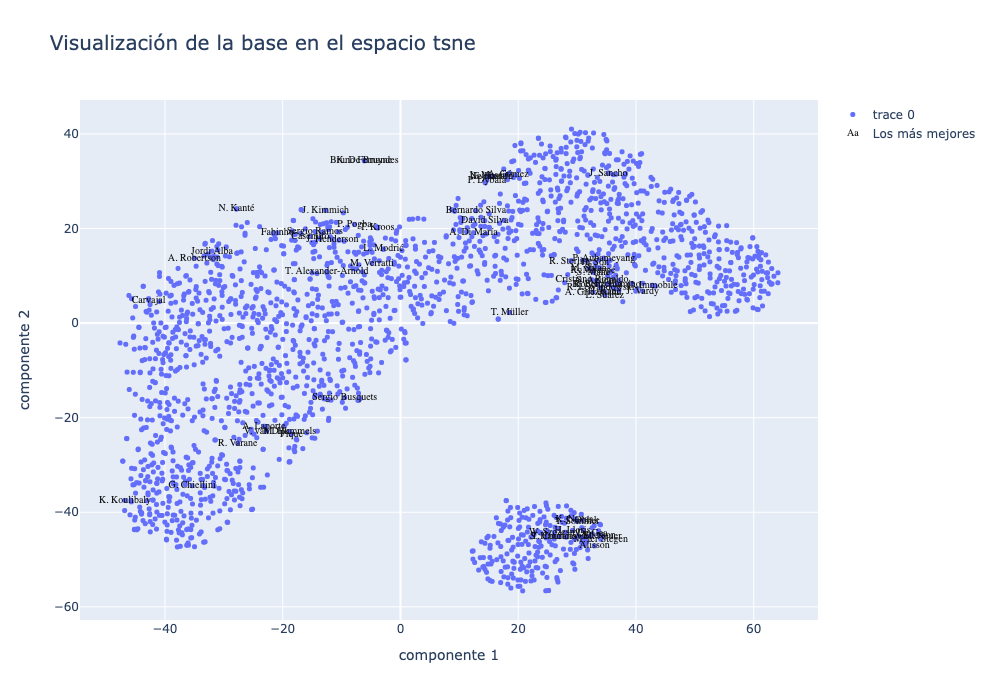

'temp-plot.html'

In [169]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        #text=dfNew.loc[:,'position'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

iplot(fig)
plot(fig)

In [170]:
bool_crack.value_counts()

False    1939
True       62
Name: overall, dtype: int64

In [171]:
X_tsne[bool_crack,1]

array([ 31.13946  ,   9.143271 , -41.713963 ,   7.471422 ,  30.993069 ,
        34.33613  ,  11.028821 , -45.730324 , -22.824253 , -47.116184 ,
        10.7183   ,  11.623921 , -45.03975  ,   8.970617 ,  19.362864 ,
         8.195335 , -45.06715  ,  18.325348 , -44.83439  ,  13.11897  ,
        23.848764 ,   6.6572046,  30.21045  , -45.15507  ,  20.293104 ,
        31.028097 , -37.511    ,  24.128422 ,  31.711782 ,  10.896411 ,
        34.33454  , -21.81717  ,  19.074354 ,  13.723155 ,  23.771313 ,
       -34.3996   , -43.843964 ,   5.922072 ,  15.672526 ,  19.109997 ,
       -44.20253  ,  13.751509 , -15.753941 ,   7.9860682, -41.43754  ,
         6.528979 ,  12.873994 ,   8.227753 , -25.41007  ,  20.861721 ,
        12.684024 ,  31.504873 , -23.500933 ,  21.651663 , -41.946293 ,
       -22.934214 ,  17.76592  ,  15.209927 ,   2.2479827, -44.596134 ,
         4.8317337,   6.756817 ], dtype=float32)

Para poder interpretar los resultados, categorizaremos sus atributos de acuerdo a las posiciones que ocupan en el campo de juego:

In [172]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [173]:
def GK(position):
    if position in goalkeepers:
        return 'GK'

In [174]:
#aplicamos funciones para conocer las posiciones de cada jugador
df_sne["Position2"] = df_sne["max"].apply(lambda x: pos2(x))
df_sne["Position3"] = df_sne["player_positions"].apply(lambda x: GK(x))
df_sne["Position3"] = df_sne["Position3"].replace([None], np.nan)
df_sne["Position4"] = df_sne["Position3"].combine_first(df_sne["Position2"])

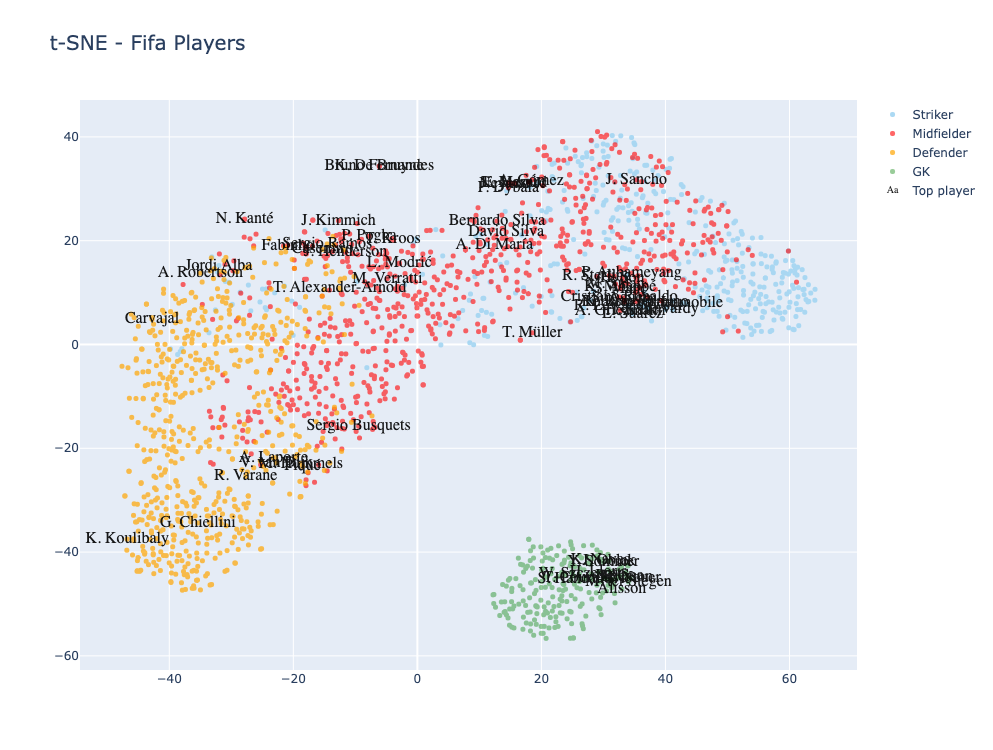

In [175]:
bool_striker= df_sne["Position4"] == 'Forward'
bool_midfielder= df_sne["Position4"] == 'Midfielder'
bool_defender= df_sne["Position4"] == 'Defender'
bool_gk= df_sne["Position4"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=750)

fig = go.Figure(data=data, layout=layout)

iplot(fig)
#plot(fig)

Podemos concluir que la reducción de dimensionalidad ha mantenido características de los jugadores de manera tal, que se puede visualizar su agrupamiento de acuerdo a sus posiciones en el campo de juego

# n4 - Análisis Componentes Principales 

In [176]:
n_acp=18000

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["max"]!='GK')&(df['overall']>70)]

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

#otros skills_ratings ! sacamos las habilidades de los arqueros

In [177]:
X=df_acp[skills_ratings] # Datos para proyectar
X = X.fillna(0)
print('los datos tienen dimesión n= ',len(skills_ratings))

los datos tienen dimesión n=  39


In [178]:
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray Estandarizado (le resta la media y divide por el desvío) por columna

In [179]:
print(X_scaled[0:2])
X.head(2)

[[ 0.89341597  1.64054203  1.43694028  1.36837168 -0.62538874  0.07090608
   1.35282833  1.99110153  0.60475036  1.6447477   1.8792487   1.63839747
   1.80103459  2.22679174  1.98436235  1.7132271   1.58350903  0.83940079
   1.61782652  3.99362447  1.99237369  1.56657953 -0.05017479  0.17046351
  -0.03938389  1.85065304 -1.18595155 -0.66028143  1.64226698  2.38980733
   1.20273475  2.90976256 -0.84235229 -1.18520392 -0.55855064 -0.30790154
  -0.08604237 -0.15020751 -0.45182514]
 [ 1.06054253  1.68541808  0.96909974  1.10315011 -0.74989803  0.60762341
   1.30063631  1.99110153  1.68285685  0.99987689  1.77633804  1.21876832
   1.19142352  1.29364596  1.01363407  1.46955662  1.30842099  1.60839702
   1.33468649  4.17681938  0.32907221  2.25295757  2.19954667  0.9627018
   0.74343608  1.80066534 -0.08035825 -1.16052702  1.7396543   1.40328776
   1.7407874   2.80062379 -0.9712928  -1.18520392 -0.50768414 -0.30790154
  -0.08604237 -0.15020751 -0.30263853]]


pace  shooting  passing  dribbling  defending  physic  attacking_crossing  \
0  85.0      92.0     91.0       95.0       38.0    65.0                  85   
1  89.0      93.0     81.0       89.0       35.0    77.0                  84   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       82   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               96           93                 94   
1                 86               88           81                 76   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  91                  96                     91   
1                  77                  92                     87   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     91                87                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             72   
1                71                94             95             84   

   power_strength  power_long_shots  mentality_aggression  \
0              69                94                    44   
1              78                93                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       29                     95                82   

   mentality_penalties  mentality_composure  defending_standing_tackle  \
0                   75                   96                         35   
1                   84                   95                         32   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        24                   6                    11   
1                        24                   7                    11   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
0                   15                       14                     8  
1                   15                       14                    11

Elegimos n elemntos para quedarnos con una cantidad menor de componentes. Explicarán un buen porcentaje de la dispersión de los datos. 

In [180]:
pca=decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.58798126 0.14977633 0.05931141 0.04507767]
proporción de varianza por componente acumulada:  [0.58798126 0.73775759 0.79706899 0.84214667]
tamaño de los datos:  (4512, 4)


In [181]:
print (X_projected[0:5])#5 primeros jugadores, n_components

[[-6.67447438 -4.85684728  1.91540396 -2.42417421]
 [-6.13544668 -3.64436931  3.13430886  0.10127656]
 [12.97055415 -2.1107588   0.86324139 -2.46838734]
 [-5.56503749 -2.53976115  3.6937948  -0.17303803]
 [-6.09782842 -5.17311321  0.63623145 -2.09889188]]


In [182]:
pcs=pca.components_  #"composición" de las primeras componentes, 
print(pcs)  # el aporte/pesos de las variables: skills_ratings

[[-0.18859112 -0.19322921 -0.20546308 -0.20545167 -0.13098607 -0.17844006
  -0.18358549 -0.16721032 -0.13943376 -0.19548316 -0.16543656 -0.19894987
  -0.17940184 -0.16068368 -0.16958401 -0.20261999 -0.1365495  -0.13386705
  -0.14116071 -0.04352118 -0.1343291  -0.12690562 -0.0165359  -0.1684416
   0.00645722 -0.17989835 -0.12616964 -0.09227749 -0.18433025 -0.13512659
  -0.16055954 -0.14332961 -0.09893868 -0.08971921  0.19276422  0.1924766
   0.19143042  0.19275293  0.19277482]
 [-0.02236823 -0.10963785  0.01632547 -0.01948233  0.30642512  0.17902331
  -0.05231991 -0.18794745  0.19457501  0.04522764 -0.1692881  -0.07365409
  -0.11892482 -0.12043268  0.08307365 -0.01639364 -0.14782737 -0.11019195
  -0.18388477 -0.03908618 -0.15315857 -0.16110297  0.12587189  0.08292355
   0.22770053 -0.13276497  0.25673897  0.32635812 -0.13669116 -0.17453728
  -0.13309211 -0.00168053  0.32796662  0.33387431 -0.09389358 -0.09366394
  -0.09399367 -0.09263403 -0.09354354]
 [-0.19272555  0.13460706 -0.0071816

In [183]:
#Graph 1
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)
#plot(fig)

In [184]:
#En Colab
fig.show(renderer="colab")

Comparamos dos equipos y vemos los perfiles en las dos primeras componentes

In [185]:
teamA='Paris Saint-Germain'
teamB='FC Bayern München'

bool_teamA=df_acp["club_name"]==teamA
bool_teamB=df_acp["club_name"]==teamB

palette=['navy','red','#A2D5F2','orange','green','pink','grey']  
data=[]

acp_teamA =go.Scatter(x=X_projected[bool_teamA,0], y=X_projected[bool_teamA,1],name=teamA,
                      text=df_acp.loc[bool_teamA,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[1],size=10),mode='markers+text')

acp_teamB =go.Scatter(x=X_projected[bool_teamB,0], y=X_projected[bool_teamB,1],name=teamB,
                      text=df_acp.loc[bool_teamB,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[4],size=10),mode='markers+text')

acp_all =go.Scatter(x=X_projected[:,0], y=X_projected[:,1],name='All',
                         text=df_acp.loc[:,'short_name'],
                         opacity=0.3,marker=dict(color=palette[6],size=3),mode='markers')


data=[acp_teamA,acp_teamB,acp_all]

layout = go.Layout(title="ACP - {} vs {}".format(teamA,teamB),titlefont=dict(size=20),
                xaxis=dict(title='F1'),
                yaxis=dict(title='F2'),
                autosize=False, width=1000,height=750)

fig = go.Figure(data=data, layout=layout)
#plot(fig)

In [186]:
#En Colab
fig.show(renderer="colab")

# Clustering

Trabajo en grupo: Veamos ahora que agrupamientos podemos hacer de los jugadores usando las dos/tres o cuatro primeras componentes.

In [187]:
##Hay que quitar MachineGun para Clustering

X=df_acp[skills_ratings] # Datos sin estandarizar
X = X.fillna(0)
X_scaled=std_scale.transform(X) # volvemos a normalizar (ya estaba ajustada)
X_projected=pca.transform(X_scaled) #volvemos a proyectar 
print('dimensiones de la base proyectada:', X_projected.shape)

dimensiones de la base proyectada: (4512, 4)


In [188]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust_2 = 2
n_clust_3 = 3
n_clust_6 = 6

km_2 = KMeans(n_clusters = n_clust_2)
km_3 = KMeans(n_clusters = n_clust_3)
km_6 = KMeans(n_clusters = n_clust_6)

km_2.fit(df_skills) 
km_3.fit(df_skills) 
km_6.fit(df_skills) 

# Recuperacion de etiquetas
clusters_2 = km_2.labels_
clusters_3 = km_3.labels_
clusters_6 = km_6.labels_

print('Suma de los cuadrados de las distancias al cluster (2) = Inertia = ', km_2.inertia_)
print('Suma de los cuadrados de las distancias al cluster (3) = Inertia = ', km_3.inertia_)
print('Suma de los cuadrados de las distancias al cluster (6) = Inertia = ', km_6.inertia_)

Suma de los cuadrados de las distancias al cluster (2) = Inertia =  19669891.08124055
Suma de los cuadrados de las distancias al cluster (3) = Inertia =  13305467.885237005
Suma de los cuadrados de las distancias al cluster (6) = Inertia =  8588077.25879071


In [189]:
kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=dfNew.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Cracks!!',
                      text=dfNew.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4512 but corresponding boolean dimension is 2001

In [ ]:
kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=dfNew.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_6.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Cracks!!',
                      text=dfNew.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=dfNew.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Cracks!!',
                      text=dfNew.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Observando los resultados de aplicar el proceso de análisis no supervisado k-means con 2, 3 y 6 clusters, vemos como la inertia baja en el caso de elección de 6 clusters. Pero, viendo los gráficos, la cantidad de clusters elegida si queremos separar los 2 grandes grupos que se observan, deberá ser 2. Como conclusión, creemos que la decisión de cantidad de clusters dependerá de cuán específico querramos que los datos sean agrupables y la necesidad de información que querramos. También concluímos que ademñas de los resultados estadísitcos, debemos tener en cuenta la visualización de los mismos.

## Visualizando las primeras 2 componentes con MeanShift

Aqui decidimos utilizar el proceso de MeanShift que ya utilizamos en el primer punto del presente análisis para conocer cómo separa los datos que arrojo el analisis de componentes principales

In [ ]:
clusters2= ms.labels_

data=[]
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86

kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Top players',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,acp_crack]

layout = go.Layout(title="ACP + Clustering Mean Shift ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

Llegamos a la conclusión que se puede observar que el método mean shift individualiza de manera correcta y sin mezclar los datos de los 2 grupos que se observan a "simple vista". Funcionó correctamente el método mean shift utilizado al principio del análisis. 
Entendemos que el tipo de análisis y profundidad dependerá de lo que querramos conocer de los datos que tenemos en frente, y que la visualización es muy importante para obtener la dimensión de su agrupamiento o separación. 